In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
fold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
import matplotlib.pyplot as plt
%matplotlib inline

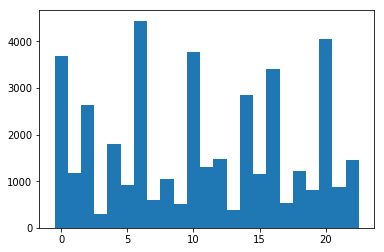

In [2]:
df = pd.read_csv('chord_data.csv',header=None)
#Make a class for each combination of root and type
y = df.iloc[:,0]*2+df.iloc[:,1]
n_class = y.unique().size
X = df.iloc[:,2:]
plt.hist(y,bins=np.linspace(0, n_class-1, num=n_class)-0.5);

In [4]:
print("==Decision Tree==")
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=fold, scoring="accuracy")
print("Cross-validation error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

==Decision Tree==
Cross-validation error = 0.264756 +-0.003807


In [6]:
print("==Multi-layer Perceptron==")
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(24, 24), activation="tanh", learning_rate="invscaling")
scores = cross_val_score(clf, X, y, cv=fold, scoring="accuracy")
print("Cross-validation error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

==Multi-layer Perceptron==
Cross-validation error = 0.180175 +-0.002623


In [5]:
print("==Support Vector Machine==")
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
scores = cross_val_score(clf, X, y, cv=fold, scoring="accuracy")
print("Cross-validation error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

==Support Vector Machine==
Cross-validation error = 0.169384 +-0.002183


In [7]:
print("==K-Means==")
from sklearn import cluster
clf = cluster.KMeans(n_clusters=n_class, n_init=20, max_iter=1000)
scores = cross_val_score(clf, X, y, cv=fold, scoring="accuracy")
print("Cross-validation error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

==K-Means==
Cross-validation error = 0.983713 +-0.019053
